In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pylab as plt

In [2]:
class System:
    def __init__(self):
        pass
    def __call__(self, x, y):
        return np.vstack((
            -0.04*y[0] + 10000*y[1]*y[2],
            0.04*y[0] - 10000*y[1]*y[2] - 30000000*y[1]**2,
            30000000*y[1]**2))

In [15]:
solution = np.empty((100, 4))
solution[:, 0] = np.linspace(0, 100, solution.shape[0])

solver = scipy.integrate.ode(System()).set_integrator('vode', method='bdf', nsteps=8000)
solver.set_initial_value((1,0,0), 0)
for i in range(solution.shape[0]):
    solution[i, [1,2,3]] = solver.integrate(solver.t + 1)

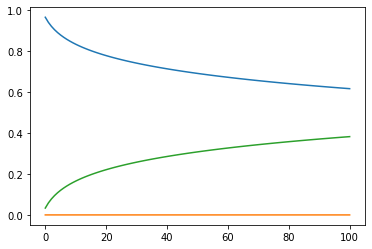

In [16]:
plt.plot(solution[:, 0], solution[:, [1,2,3]])
plt.show()